In [1]:
import re
import csv
import os
import glob
import numpy as np
import pandas as pd
from datetime import timedelta

In [68]:
import re
import csv
import os
import glob
import numpy as np
import pandas as pd
from datetime import timedelta

clubs_2006 = [
    'kashima-antlers', 'jef-united', 'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka', 'sanfrecce-hiroshima',  'jubilo-iwata',  'cerezo-osaka', 
     'kawasaki-frontale', 'fc-tokyo', 'avispa-fukuoka', 'kyoto-sanga', 
     'omiya-ardija', 'ventforet-kofu',  'oita-trinita','albirex-niigata'
]

clubs_2007 = [
    'kashima-antlers', 'jef-united', 'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka', 'sanfrecce-hiroshima',  'jubilo-iwata',  
     'kawasaki-frontale', 'fc-tokyo',   
     'omiya-ardija', 'ventforet-kofu',  'oita-trinita','albirex-niigata',
    'vissel-kobe','kashiwa-reysol','yokohama-fc',
]

clubs_2008 = [
    'kashima-antlers', 'jef-united', 'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka',  'jubilo-iwata',  
     'kawasaki-frontale', 'fc-tokyo',   
     'omiya-ardija',   'oita-trinita','albirex-niigata',
    'vissel-kobe','kashiwa-reysol',
     'consadole-sapporo',  'tokyo-verdy','kyoto-sanga',
]

clubs_2009 = [
    'kashima-antlers', 'jef-united', 'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka',  'jubilo-iwata',  
     'kawasaki-frontale', 'fc-tokyo',   
     'omiya-ardija',   'oita-trinita','albirex-niigata',
    'vissel-kobe','kashiwa-reysol',
     'kyoto-sanga','sanfrecce-hiroshima', 'montedio-yamagata',
]

clubs_2010 = [
    'kashima-antlers',  'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka',  'jubilo-iwata',  
     'kawasaki-frontale', 'fc-tokyo',   
     'omiya-ardija',   'albirex-niigata',
    'vissel-kobe',
     'kyoto-sanga','sanfrecce-hiroshima', 'montedio-yamagata',
     'vegalta-sendai', 'cerezo-osaka', 'shonan-bellmare',
]

clubs_2011 = [
    'kashima-antlers',  'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka',  'jubilo-iwata',  
     'kawasaki-frontale',    
     'omiya-ardija',   'albirex-niigata',
    'vissel-kobe',
     'sanfrecce-hiroshima', 'montedio-yamagata',
     'vegalta-sendai', 'cerezo-osaka',
     'kashiwa-reysol', 'ventforet-kofu', 'avispa-fukuoka',
]

clubs_2012 = [
    'kashima-antlers',  'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'gamba-osaka',  'jubilo-iwata',  'kawasaki-frontale',    
     'omiya-ardija',   'albirex-niigata','vissel-kobe',
     'sanfrecce-hiroshima', 'vegalta-sendai', 'cerezo-osaka',
     'kashiwa-reysol',  'fc-tokyo', 'sagan-tosu', 'consadole-sapporo',
]

clubs_2013 = [
    'kashima-antlers',  'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
    'jubilo-iwata',  'kawasaki-frontale',    
     'omiya-ardija',   'albirex-niigata',
     'sanfrecce-hiroshima', 'vegalta-sendai', 'cerezo-osaka',
     'kashiwa-reysol',  'fc-tokyo', 'sagan-tosu', 
     'ventforet-kofu', 'shonan-bellmare', 'oita-trinita',
]

clubs_2014 = [
    'kashima-antlers',  'urawa-red-diamonds', 
     'yokohama-fa-marinos', 'shimizu-s-pulse', 'nagoya-grampus-eight', 
     'kawasaki-frontale',    
     'omiya-ardija',   'albirex-niigata',
     'sanfrecce-hiroshima', 'vegalta-sendai', 'cerezo-osaka',
     'kashiwa-reysol',  'fc-tokyo', 'sagan-tosu', 
     'ventforet-kofu',   'gamba-osaka', 'vissel-kobe', 'tokushima-vortis',
]

clubs_2015 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
    'shimizu-s-pulse', 'nagoya-grampus-eight', 'kawasaki-frontale',
    'albirex-niigata','sanfrecce-hiroshima', 'vegalta-sendai','kashiwa-reysol',
    'fc-tokyo', 'sagan-tosu', 'ventforet-kofu', 'gamba-osaka', 
    'vissel-kobe', 'shonan-bellmare', 'matsumoto-yamaga', 'montedio-yamagata',
]

clubs_2016 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
    'nagoya-grampus-eight', 'kawasaki-frontale',
    'albirex-niigata','sanfrecce-hiroshima', 'vegalta-sendai','kashiwa-reysol',
    'fc-tokyo', 'sagan-tosu', 'ventforet-kofu', 'gamba-osaka', 
    'vissel-kobe', 'shonan-bellmare', 
    'omiya-ardija', 'jubilo-iwata', 'avispa-fukuoka',
]

clubs_2017 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
     'kawasaki-frontale',
    'albirex-niigata','sanfrecce-hiroshima', 'vegalta-sendai','kashiwa-reysol',
    'fc-tokyo', 'sagan-tosu', 'ventforet-kofu', 'gamba-osaka', 
    'vissel-kobe','omiya-ardija', 'jubilo-iwata', 
     'consadole-sapporo', 'shimizu-s-pulse', 'cerezo-osaka',
]

clubs_2018 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
     'kawasaki-frontale',
    'sanfrecce-hiroshima', 'vegalta-sendai','kashiwa-reysol',
    'fc-tokyo', 'sagan-tosu',  'gamba-osaka', 
    'vissel-kobe', 'jubilo-iwata', 
     'consadole-sapporo', 'shimizu-s-pulse', 'cerezo-osaka',
     'shonan-bellmare', 'v-varen-nagasaki', 'nagoya-grampus-eight',
]

clubs_2019 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
     'kawasaki-frontale',
    'sanfrecce-hiroshima', 'vegalta-sendai',
    'fc-tokyo', 'sagan-tosu',  'gamba-osaka', 
    'vissel-kobe', 'jubilo-iwata', 
     'consadole-sapporo', 'shimizu-s-pulse', 'cerezo-osaka',
     'shonan-bellmare',  'nagoya-grampus-eight',
     'matsumoto-yamaga', 'oita-trinita',
]


clubs_2020 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
     'kawasaki-frontale','sanfrecce-hiroshima', 'vegalta-sendai',
    'fc-tokyo', 'sagan-tosu',  'gamba-osaka', 'vissel-kobe', 
     'consadole-sapporo', 'shimizu-s-pulse', 'cerezo-osaka',
     'shonan-bellmare',  'nagoya-grampus-eight',
      'oita-trinita', 'kashiwa-reysol', 'yokohama-fc',
]


clubs_2021 = [
    'kashima-antlers',  'urawa-red-diamonds', 'yokohama-fa-marinos',
    'kawasaki-frontale','sanfrecce-hiroshima', 'vegalta-sendai',
    'fc-tokyo', 'sagan-tosu',  'gamba-osaka', 'vissel-kobe', 
    'consadole-sapporo', 'shimizu-s-pulse', 'cerezo-osaka',
    'shonan-bellmare',  'nagoya-grampus-eight','oita-trinita', 
    'kashiwa-reysol', 'yokohama-fc','tokushima-vortis','avispa-fukuoka',
]

In [69]:
def calculate_rate(home_rate,away_rate,g):
    k=16
    e = 1 /(1+pow(10, (away_rate-home_rate)/400) )
    home_rate =  home_rate+k*(g-e) 
    away_rate = away_rate+k*(abs(g-1)-(1-e))
    return home_rate,away_rate


def calculate_g(n):
    g=0
    if n == 1:
        g=1
    elif n == 0:
        g=0.5
    else:
        g=0        
    return g  

In [70]:
df_match_2006 = pd.read_csv("./match_data_yearly/2006.csv", index_col=0)
df_match_2006["Date"] = pd.to_datetime(df_match_2006["Date"])
df_match_2006 = df_match_2006.sort_values(["Date","Sec"])
df_match_2006

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances
ID,,,,,,,,,,,,
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916
6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277
6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199
...,...,...,...,...,...,...,...,...,...,...,...,...
6340710,2006,34,2006-12-02,shimizu-s-pulse,sanfrecce-hiroshima,7,10,3,0,1,日本平,13581
6342408,2006,34,2006-12-02,kyoto-sanga,nagoya-grampus-eight,24,8,0,1,2,西京極,9110
6342021,2006,34,2006-12-02,cerezo-osaka,kawasaki-frontale,20,21,1,3,2,長居２,9278


In [71]:
date_index = pd.date_range(start=df_match_2006.iloc[0]["Date"] , end=df_match_2006.iloc[-1]["Date"]+timedelta(days=1), freq="D")
date_index


DatetimeIndex(['2006-03-04', '2006-03-05', '2006-03-06', '2006-03-07',
               '2006-03-08', '2006-03-09', '2006-03-10', '2006-03-11',
               '2006-03-12', '2006-03-13',
               ...
               '2006-11-24', '2006-11-25', '2006-11-26', '2006-11-27',
               '2006-11-28', '2006-11-29', '2006-11-30', '2006-12-01',
               '2006-12-02', '2006-12-03'],
              dtype='datetime64[ns]', length=275, freq='D')

In [72]:
df_elo = pd.DataFrame(columns=clubs_2006, index=date_index)
df_elo

,kashima-antlers,jef-united,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,sanfrecce-hiroshima,jubilo-iwata,cerezo-osaka,kawasaki-frontale,fc-tokyo,avispa-fukuoka,kyoto-sanga,omiya-ardija,ventforet-kofu,oita-trinita,albirex-niigata
2006-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df_elo.iloc[0] = 1500
df_elo

,kashima-antlers,jef-united,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,sanfrecce-hiroshima,jubilo-iwata,cerezo-osaka,kawasaki-frontale,fc-tokyo,avispa-fukuoka,kyoto-sanga,omiya-ardija,ventforet-kofu,oita-trinita,albirex-niigata
2006-03-04,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
2006-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
final_rates=None

for current_date in date_index[:-1]:
    prev_date = current_date+timedelta(days=1)
    df_current_date = df_match_2006[df_match_2006["Date"] == current_date]
    for i,r in df_current_date.iterrows():
        home_rate = df_elo.loc[current_date, r["Home"]]
        away_rate = df_elo.loc[current_date, r["Away"]]
        g = calculate_g(r["W/L"])
        
        prev_home_rate, prev_away_rate = calculate_rate(home_rate,away_rate,g)
        
        df_elo.at[prev_date,r["Home"]] = prev_home_rate
        df_elo.at[prev_date,r["Away"]] = prev_away_rate
        
    df_elo.loc[prev_date] = df_elo.loc[prev_date].fillna(df_elo.loc[current_date])
    
final_rates = df_elo.iloc[-1]

In [75]:
df_elo

,kashima-antlers,jef-united,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,sanfrecce-hiroshima,jubilo-iwata,cerezo-osaka,kawasaki-frontale,fc-tokyo,avispa-fukuoka,kyoto-sanga,omiya-ardija,ventforet-kofu,oita-trinita,albirex-niigata
2006-03-04,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
2006-03-05,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
2006-03-06,1508,1492,1500,1508,1508,1508,1500,1492,1500,1492,1508,1508,1500,1492,1508,1492,1492,1492
2006-03-07,1508,1492,1500,1508,1508,1508,1500,1492,1500,1492,1508,1508,1500,1492,1508,1492,1492,1492
2006-03-08,1508,1492,1500,1508,1508,1508,1500,1492,1500,1492,1508,1508,1500,1492,1508,1492,1492,1492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-11-29,1521.32,1480.07,1581.62,1476.72,1537.89,1510.44,1563.63,1506.84,1556.64,1443.04,1565.55,1469.13,1438.95,1414.82,1473.02,1479.82,1501.44,1479.07
2006-11-30,1521.32,1480.07,1581.62,1476.72,1537.89,1510.44,1563.63,1506.84,1556.64,1443.04,1565.55,1469.13,1438.95,1414.82,1473.02,1479.82,1501.44,1479.07
2006-12-01,1521.32,1480.07,1581.62,1476.72,1537.89,1510.44,1563.63,1506.84,1556.64,1443.04,1565.55,1469.13,1438.95,1414.82,1473.02,1479.82,1501.44,1479.07
2006-12-02,1521.32,1480.07,1581.62,1476.72,1537.89,1510.44,1563.63,1506.84,1556.64,1443.04,1565.55,1469.13,1438.95,1414.82,1473.02,1479.82,1501.44,1479.07


In [76]:
final_rates

kashima-antlers         1530.13
jef-united                 1472
urawa-red-diamonds      1589.21
yokohama-fa-marinos      1484.8
shimizu-s-pulse         1545.18
nagoya-grampus-eight    1516.29
gamba-osaka             1556.05
sanfrecce-hiroshima     1499.56
jubilo-iwata            1547.83
cerezo-osaka            1437.74
kawasaki-frontale       1570.84
fc-tokyo                1477.87
avispa-fukuoka          1439.89
kyoto-sanga             1408.97
omiya-ardija            1481.16
ventforet-kofu          1478.88
oita-trinita             1492.7
albirex-niigata         1470.93
Name: 2006-12-03 00:00:00, dtype: object

In [77]:
relegated_clubs = list(set(clubs_2006) - set(clubs_2007))
relegated_clubs

['kyoto-sanga', 'cerezo-osaka', 'avispa-fukuoka']

In [78]:
relegation_rate = final_rates.loc[relegated_clubs].mean()
relegation_rate

1428.866916346754

In [79]:
df_match_2007 = pd.read_csv("./match_data_yearly/2007.csv", index_col=0)
df_match_2007["Date"] = pd.to_datetime(df_match_2007["Date"])
df_match_2007 = df_match_2007.sort_values(["Date","Sec"])
df_match_2007

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances
ID,,,,,,,,,,,,
7012210,2007,1,2007-03-03,fc-tokyo,sanfrecce-hiroshima,22,10,2,4,2,味スタ,25257
7010528,2007,1,2007-03-03,yokohama-fa-marinos,ventforet-kofu,5,28,1,0,1,日産ス,24466
7013178,2007,1,2007-03-03,oita-trinita,albirex-niigata,31,78,1,1,0,九石ド,20039
7012101,2007,1,2007-03-03,kawasaki-frontale,kashima-antlers,21,1,1,0,1,等々力,20295
7010718,2007,1,2007-03-03,shimizu-s-pulse,vissel-kobe,7,18,1,0,1,日本平,18333
...,...,...,...,...,...,...,...,...,...,...,...,...
7342822,2007,34,2007-12-01,ventforet-kofu,fc-tokyo,28,22,0,1,2,小瀬,14777
7347831,2007,34,2007-12-01,albirex-niigata,oita-trinita,78,31,0,2,2,東北電ス,37430
7341311,2007,34,2007-12-01,jubilo-iwata,kashiwa-reysol,13,11,4,0,1,ヤマハ,13923


In [80]:
date_index = pd.date_range(start=df_match_2007.iloc[0]["Date"] , end=df_match_2007.iloc[-1]["Date"]+timedelta(days=1), freq="D")
date_index

DatetimeIndex(['2007-03-03', '2007-03-04', '2007-03-05', '2007-03-06',
               '2007-03-07', '2007-03-08', '2007-03-09', '2007-03-10',
               '2007-03-11', '2007-03-12',
               ...
               '2007-11-23', '2007-11-24', '2007-11-25', '2007-11-26',
               '2007-11-27', '2007-11-28', '2007-11-29', '2007-11-30',
               '2007-12-01', '2007-12-02'],
              dtype='datetime64[ns]', length=275, freq='D')

In [81]:
df_elo = pd.DataFrame(columns=clubs_2007, index=date_index)
df_elo

,kashima-antlers,jef-united,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,sanfrecce-hiroshima,jubilo-iwata,kawasaki-frontale,fc-tokyo,omiya-ardija,ventforet-kofu,oita-trinita,albirex-niigata,vissel-kobe,kashiwa-reysol,yokohama-fc
2007-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df_elo.iloc[0] = final_rates
df_elo.iloc[0] = df_elo.iloc[0].fillna(relegation_rate)
df_elo

,kashima-antlers,jef-united,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,sanfrecce-hiroshima,jubilo-iwata,kawasaki-frontale,fc-tokyo,omiya-ardija,ventforet-kofu,oita-trinita,albirex-niigata,vissel-kobe,kashiwa-reysol,yokohama-fc
2007-03-03,1530.13,1472,1589.21,1484.8,1545.18,1516.29,1556.05,1499.56,1547.83,1570.84,1477.87,1481.16,1478.88,1492.7,1470.93,1428.87,1428.87,1428.87
2007-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
for current_date in date_index[:-1]:
    prev_date = current_date+timedelta(days=1)
    df_current_date = df_match_2007[df_match_2007["Date"] == current_date]
    for i,r in df_current_date.iterrows():
        home_rate = df_elo.loc[current_date, r["Home"]]
        away_rate = df_elo.loc[current_date, r["Away"]]
        g = calculate_g(r["W/L"])
        
        prev_home_rate, prev_away_rate = calculate_rate(home_rate,away_rate,g)
        
        df_elo.at[prev_date,r["Home"]] = prev_home_rate
        df_elo.at[prev_date,r["Away"]] = prev_away_rate
        
    df_elo.loc[prev_date] = df_elo.loc[prev_date].fillna(df_elo.loc[current_date])
    
final_rates = df_elo.iloc[-1]

In [84]:
df_elo

,kashima-antlers,jef-united,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,sanfrecce-hiroshima,jubilo-iwata,kawasaki-frontale,fc-tokyo,omiya-ardija,ventforet-kofu,oita-trinita,albirex-niigata,vissel-kobe,kashiwa-reysol,yokohama-fc
2007-03-03,1530.13,1472,1589.21,1484.8,1545.18,1516.29,1556.05,1499.56,1547.83,1570.84,1477.87,1481.16,1478.88,1492.7,1470.93,1428.87,1428.87,1428.87
2007-03-04,1523.06,1472,1593.76,1492.66,1550.59,1516.29,1562.35,1507.06,1547.83,1577.9,1470.37,1474.86,1471.02,1492.19,1471.43,1423.45,1428.87,1424.32
2007-03-05,1523.06,1465.01,1593.76,1492.66,1550.59,1523.28,1562.35,1507.06,1537.19,1577.9,1470.37,1474.86,1471.02,1492.19,1471.43,1423.45,1439.5,1424.32
2007-03-06,1523.06,1465.01,1593.76,1492.66,1550.59,1523.28,1562.35,1507.06,1537.19,1577.9,1470.37,1474.86,1471.02,1492.19,1471.43,1423.45,1439.5,1424.32
2007-03-07,1523.06,1465.01,1593.76,1492.66,1550.59,1523.28,1562.35,1507.06,1537.19,1577.9,1470.37,1474.86,1471.02,1492.19,1471.43,1423.45,1439.5,1424.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-11-28,1610.53,1477.89,1639.44,1506.83,1581.85,1490.64,1600.7,1431.6,1509.24,1568.91,1471.36,1457.34,1412.38,1466.99,1498.98,1469.8,1475.7,1329.82
2007-11-29,1610.53,1477.89,1639.44,1506.83,1581.85,1490.64,1600.7,1431.6,1509.24,1568.91,1471.36,1457.34,1412.38,1466.99,1498.98,1469.8,1475.7,1329.82
2007-11-30,1610.53,1477.89,1639.44,1506.83,1581.85,1490.64,1600.7,1431.6,1509.24,1568.91,1471.36,1457.34,1412.38,1466.99,1498.98,1469.8,1475.7,1329.82
2007-12-01,1610.53,1477.89,1639.44,1506.83,1581.85,1490.64,1600.7,1431.6,1509.24,1568.91,1471.36,1457.34,1412.38,1466.99,1498.98,1469.8,1475.7,1329.82


In [85]:
final_rates.sort_values(ascending=False)

urawa-red-diamonds      1625.74
kashima-antlers         1617.87
gamba-osaka             1597.09
shimizu-s-pulse         1574.51
kawasaki-frontale       1566.42
jubilo-iwata            1516.47
yokohama-fa-marinos     1505.98
nagoya-grampus-eight    1498.35
albirex-niigata         1490.24
fc-tokyo                1478.01
oita-trinita            1475.73
vissel-kobe             1470.65
jef-united              1470.19
kashiwa-reysol          1468.47
omiya-ardija            1459.82
sanfrecce-hiroshima     1435.22
ventforet-kofu          1405.72
yokohama-fc             1343.52
Name: 2007-12-02 00:00:00, dtype: object

In [86]:
df_elo.astype(int)

,kashima-antlers,jef-united,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,sanfrecce-hiroshima,jubilo-iwata,kawasaki-frontale,fc-tokyo,omiya-ardija,ventforet-kofu,oita-trinita,albirex-niigata,vissel-kobe,kashiwa-reysol,yokohama-fc
2007-03-03,1530,1471,1589,1484,1545,1516,1556,1499,1547,1570,1477,1481,1478,1492,1470,1428,1428,1428
2007-03-04,1523,1471,1593,1492,1550,1516,1562,1507,1547,1577,1470,1474,1471,1492,1471,1423,1428,1424
2007-03-05,1523,1465,1593,1492,1550,1523,1562,1507,1537,1577,1470,1474,1471,1492,1471,1423,1439,1424
2007-03-06,1523,1465,1593,1492,1550,1523,1562,1507,1537,1577,1470,1474,1471,1492,1471,1423,1439,1424
2007-03-07,1523,1465,1593,1492,1550,1523,1562,1507,1537,1577,1470,1474,1471,1492,1471,1423,1439,1424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-11-28,1610,1477,1639,1506,1581,1490,1600,1431,1509,1568,1471,1457,1412,1466,1498,1469,1475,1329
2007-11-29,1610,1477,1639,1506,1581,1490,1600,1431,1509,1568,1471,1457,1412,1466,1498,1469,1475,1329
2007-11-30,1610,1477,1639,1506,1581,1490,1600,1431,1509,1568,1471,1457,1412,1466,1498,1469,1475,1329
2007-12-01,1610,1477,1639,1506,1581,1490,1600,1431,1509,1568,1471,1457,1412,1466,1498,1469,1475,1329


In [87]:
relegated_clubs = list(set(clubs_2007) - set(clubs_2008))
relegated_clubs

['ventforet-kofu', 'sanfrecce-hiroshima', 'yokohama-fc']

In [89]:
# df_clubs =pd.DataFrame(index=range(2006,2021), columns=range(1,21))
# for year,clubs in zip(range(2006,2021), [clubs_2006,clubs_2007,clubs_2008,clubs_2009,clubs_2010,clubs_2011,clubs_2012,clubs_2013,clubs_2014,clubs_2015,clubs_2016,clubs_2017,clubs_2018,clubs_2019,clubs_2020,clubs_2021]):
#     df_clubs.loc[year] = clubs

In [90]:
df_clubs

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# df_clubs.to_csv("./clubs.csv")

In [92]:
df_clubs = pd.read_csv("./clubs.csv",index_col=0)

In [93]:
df_clubs.loc[2006].tolist()

['kashima-antlers',
 'jef-united',
 'urawa-red-diamonds',
 'yokohama-fa-marinos',
 'shimizu-s-pulse',
 'nagoya-grampus-eight',
 'gamba-osaka',
 'sanfrecce-hiroshima',
 'jubilo-iwata',
 'cerezo-osaka',
 'kawasaki-frontale',
 'fc-tokyo',
 'avispa-fukuoka',
 'kyoto-sanga',
 'omiya-ardija',
 'ventforet-kofu',
 'oita-trinita',
 'albirex-niigata']

In [94]:
df_elo.astype(int).to_csv(f"./rating/2007.csv")

In [95]:
pd.read_csv("./rating/2020.csv",index_col=0).iloc[150].sort_values(ascending=False)

kawasaki-frontale       1643
kashima-antlers         1574
fc-tokyo                1569
cerezo-osaka            1567
yokohama-fa-marinos     1564
gamba-osaka             1537
sanfrecce-hiroshima     1532
vissel-kobe             1504
urawa-red-diamonds      1502
consadole-sapporo       1497
oita-trinita            1474
vegalta-sendai          1457
nagoya-grampus-eight    1455
sagan-tosu              1438
kashiwa-reysol          1429
yokohama-fc             1429
shimizu-s-pulse         1419
shonan-bellmare         1402
Name: 2020-07-20, dtype: int64

In [96]:
csvs = glob.glob('./rating/20*.csv')
csvs

['./rating/2018.csv',
 './rating/2016.csv',
 './rating/2017.csv',
 './rating/2019.csv',
 './rating/2013.csv',
 './rating/2008.csv',
 './rating/2012.csv',
 './rating/2014.csv',
 './rating/2020.csv',
 './rating/2006.csv',
 './rating/2015.csv',
 './rating/2007.csv',
 './rating/2009.csv',
 './rating/2010.csv',
 './rating/2011.csv']

In [97]:
df_rate_allyears = pd.DataFrame()
for csv in csvs:
    df_rate_allyears = df_rate_allyears.append(pd.read_csv(csv, index_col=0,parse_dates=True))

In [98]:
df_rate_allyears

,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,kawasaki-frontale,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,gamba-osaka,...,omiya-ardija,avispa-fukuoka,matsumoto-yamaga,oita-trinita,jef-united,tokyo-verdy,kyoto-sanga,tokushima-vortis,yokohama-fc,montedio-yamagata
2018-02-23,1615,1572,1568,1654,1494.0,1451.0,1577.0,1489.0,1499.0,1506.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-24,1615,1572,1568,1654,1494.0,1451.0,1577.0,1489.0,1498.0,1506.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-25,1615,1570,1568,1654,1501.0,1451.0,1577.0,1491.0,1498.0,1496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-26,1610,1570,1566,1659,1501.0,1461.0,1566.0,1491.0,1498.0,1496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-27,1610,1570,1566,1659,1501.0,1461.0,1566.0,1491.0,1498.0,1496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-11-30,1569,1475,1527,1516,1505.0,1515.0,1535.0,NaN,NaN,1626.0,...,1472.0,1362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1374.0
2011-12-01,1569,1475,1527,1516,1505.0,1515.0,1535.0,NaN,NaN,1626.0,...,1472.0,1362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1374.0
2011-12-02,1569,1475,1527,1516,1505.0,1515.0,1535.0,NaN,NaN,1626.0,...,1472.0,1362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1374.0
2011-12-03,1569,1475,1527,1516,1505.0,1515.0,1535.0,NaN,NaN,1626.0,...,1472.0,1362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1374.0


In [102]:
df_rate_allyears = df_rate_allyears.sort_index()
df_rate_allyears

,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,kawasaki-frontale,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,gamba-osaka,...,omiya-ardija,avispa-fukuoka,matsumoto-yamaga,oita-trinita,jef-united,tokyo-verdy,kyoto-sanga,tokushima-vortis,yokohama-fc,montedio-yamagata
2006-03-04,1500,1500,1500,1500,1500.0,NaN,NaN,1500.0,NaN,1500.0,...,1500.0,1500.0,NaN,1500.0,1500.0,NaN,1500.0,NaN,NaN,NaN
2006-03-05,1500,1500,1500,1500,1500.0,NaN,NaN,1500.0,NaN,1500.0,...,1500.0,1500.0,NaN,1500.0,1500.0,NaN,1500.0,NaN,NaN,NaN
2006-03-06,1508,1500,1508,1508,1492.0,NaN,NaN,1508.0,NaN,1500.0,...,1508.0,1500.0,NaN,1492.0,1492.0,NaN,1492.0,NaN,NaN,NaN
2006-03-07,1508,1500,1508,1508,1492.0,NaN,NaN,1508.0,NaN,1500.0,...,1508.0,1500.0,NaN,1492.0,1492.0,NaN,1492.0,NaN,NaN,NaN
2006-03-08,1508,1500,1508,1508,1492.0,NaN,NaN,1508.0,NaN,1500.0,...,1508.0,1500.0,NaN,1492.0,1492.0,NaN,1492.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,1595,1490,1543,1678,1535.0,1411.0,1478.0,1541.0,1444.0,1577.0,...,NaN,NaN,NaN,1473.0,NaN,NaN,NaN,NaN,1406.0,NaN
2020-12-17,1595,1486,1543,1682,1526.0,1419.0,1487.0,1541.0,1455.0,1582.0,...,NaN,NaN,NaN,1480.0,NaN,NaN,NaN,NaN,1402.0,NaN
2020-12-18,1595,1486,1543,1682,1526.0,1419.0,1487.0,1541.0,1455.0,1582.0,...,NaN,NaN,NaN,1480.0,NaN,NaN,NaN,NaN,1402.0,NaN
2020-12-19,1595,1486,1543,1682,1526.0,1419.0,1487.0,1541.0,1455.0,1582.0,...,NaN,NaN,NaN,1480.0,NaN,NaN,NaN,NaN,1402.0,NaN


In [100]:
date_index = pd.date_range(start=df_match_2006.iloc[0]["Date"] , end=df_match_2006.iloc[-1]["Date"]+timedelta(days=1), freq="D")
date_index

DatetimeIndex(['2006-03-04', '2006-03-05', '2006-03-06', '2006-03-07',
               '2006-03-08', '2006-03-09', '2006-03-10', '2006-03-11',
               '2006-03-12', '2006-03-13',
               ...
               '2006-11-24', '2006-11-25', '2006-11-26', '2006-11-27',
               '2006-11-28', '2006-11-29', '2006-11-30', '2006-12-01',
               '2006-12-02', '2006-12-03'],
              dtype='datetime64[ns]', length=275, freq='D')

<AxesSubplot:title={'center':'Ratings from 2006 to 2020'}>

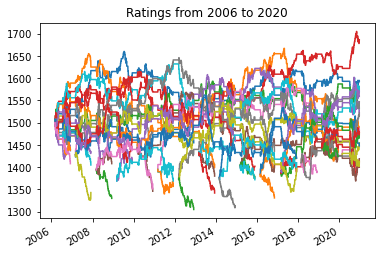

In [101]:
df_rate_allyears.plot(legend=False,title="Ratings from 2006 to 2020")


<AxesSubplot:title={'center':'Ratings for J1 teams from 2020-08 to 2020-12'}>

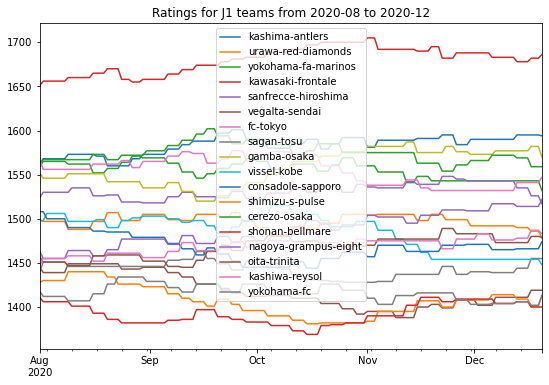

In [35]:
df_rate_allyears["2020-8":"2020-12"][clubs_2020].plot(figsize=(9,6), title="Ratings for J1 teams from 2020-08 to 2020-12")

In [36]:
df_rate_allyears.iloc[0] = df_rate_allyears.iloc[0].fillna(1350)

In [37]:
df_rate_allyears =df_rate_allyears.interpolate(limit_direction='both').astype(int)
df_rate_allyears

,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,kawasaki-frontale,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,gamba-osaka,...,omiya-ardija,avispa-fukuoka,matsumoto-yamaga,oita-trinita,jef-united,tokyo-verdy,kyoto-sanga,tokushima-vortis,yokohama-fc,montedio-yamagata
2006-03-04,1500,1500,1500,1500,1500,1350,1350,1500,1350,1500,...,1500,1500,1350,1500,1500,1350,1500,1350,1350,1350
2006-03-05,1500,1500,1500,1500,1500,1350,1350,1500,1350,1500,...,1500,1500,1350,1500,1500,1350,1500,1350,1350,1350
2006-03-06,1508,1500,1508,1508,1492,1350,1350,1508,1350,1500,...,1508,1500,1350,1492,1492,1350,1492,1350,1350,1350
2006-03-07,1508,1500,1508,1508,1492,1350,1350,1508,1350,1500,...,1508,1500,1350,1492,1492,1350,1492,1350,1350,1350
2006-03-08,1508,1500,1508,1508,1492,1350,1351,1508,1350,1500,...,1508,1500,1350,1492,1492,1350,1492,1350,1351,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,1595,1490,1543,1678,1535,1411,1478,1541,1444,1577,...,1420,1331,1424,1473,1410,1408,1362,1313,1406,1372
2020-12-17,1595,1486,1543,1682,1526,1419,1487,1541,1455,1582,...,1420,1331,1424,1480,1410,1408,1362,1313,1402,1372
2020-12-18,1595,1486,1543,1682,1526,1419,1487,1541,1455,1582,...,1420,1331,1424,1480,1410,1408,1362,1313,1402,1372
2020-12-19,1595,1486,1543,1682,1526,1419,1487,1541,1455,1582,...,1420,1331,1424,1480,1410,1408,1362,1313,1402,1372


In [38]:
df_rate_allyears.to_csv("./rating/all_years.csv")

<AxesSubplot:title={'center':'Ratings from 2006 to 2020'}>

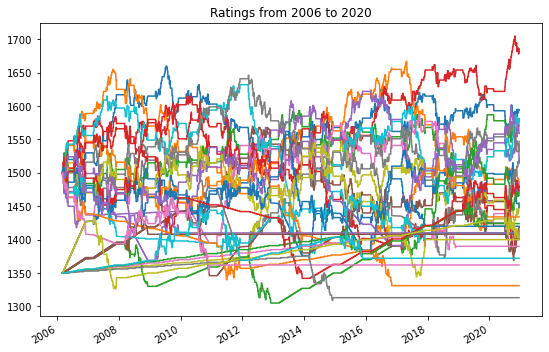

In [39]:
df_rate_allyears.plot(figsize=(9,6),legend=False,title="Ratings from 2006 to 2020")